# Flight Price:

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
df = pd.read_excel('flight_price.xlsx')
df.shape

(10683, 11)

it have 10683 rows and 11 columns

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
list(df.columns)

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# to plot histogram first we nees to clean and convert it to numerical data

In [5]:
# defing the number of coloumns to be displayed
pd.options.display.max_columns = 500

In [6]:
# checking the Null Values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Our machine Learning Model cant understand date and time there we extract the date in another three coloumn separately for date,month and year
# Extracting date of journey in separate coloumn for date,month,year
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [8]:
# changing the data type to int
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [9]:
# Dropping the 'Date_of_Journey' Coloumn
df.drop('Date_of_Journey',axis=1,inplace=True)

In [10]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [11]:
# Exthours and Arrival+minutesracting Arrival Time separately in two new coloumns that is Arival_
df['Arrival_hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)

In [12]:
df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_minutes'] = df['Arrival_minutes'].astype(int)

In [13]:
# Extarcting the Departure hour and Min frim Dep_Time 
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)

In [14]:
# Route Does affecting our inshight therefore I am Dropping it
df.drop('Route',axis=1,inplace=True)

In [15]:
# Now we extract duration in hours and minute separately in new coloumns
df['duration_hours'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['duration_minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [16]:
# checking for null  values in duration hours coloumns
df['duration_hours'].isnull().sum()

0

In [17]:
# checking wheter there is any wrong format value is present or not
df['duration_hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [18]:
for i in df:
    index = df.loc[df['duration_hours'] == '5m']
index

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min,duration_hours,duration_minutes
6474,Air India,Mumbai,Hyderabad,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,NaN


In [19]:
# Correcting the format of wrong data
df['duration_hours']=df['duration_hours'].replace('5m',5)

In [20]:
# in some rows duration is exactly in hours there is no minutes there we have some null values
# Replacing null values with 0 to show that 0 minutes
df['duration_minutes']=df['duration_minutes'].replace(np.nan,0)

In [21]:
# Converting in int dtype
df['duration_hours'] = pd.to_numeric(df['duration_hours'])
df['duration_minutes'] = pd.to_numeric(df['duration_minutes'])

In [22]:
#Converting duration_hours in minutes and add both duration hours and minutes to get a singles columns giving total duration time in minutes
df['Total_Duration_time_in_minutes'] = ((60 * df['duration_hours']) + df['duration_minutes'])

In [23]:
#now drop all the unwanted coloumns
df.drop(['Duration','duration_hours','duration_minutes'],axis = 1,inplace = True)

In [24]:
# total_Stops have categoical data 
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [25]:
# finding mode of Total stops to fill out the null values
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [26]:
# mapping the Total_stops to get non-null and int values
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [27]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dept_hour,Dept_min,Total_Duration_time_in_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [28]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [29]:
df = df.drop('Additional_Info',axis = 1)

In [30]:
df.dtypes

Airline                           object
Source                            object
Destination                       object
Total_Stops                        int64
Price                              int64
Date                               int32
Month                              int32
Year                               int32
Arrival_hours                      int32
Arrival_minutes                    int32
Dept_hour                          int32
Dept_min                           int32
Total_Duration_time_in_minutes     int64
dtype: object

In [31]:
numerical_features = [features for features in df.columns if df[features].dtype!='O']

In [32]:
numerical_features

['Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Arrival_hours',
 'Arrival_minutes',
 'Dept_hour',
 'Dept_min',
 'Total_Duration_time_in_minutes']

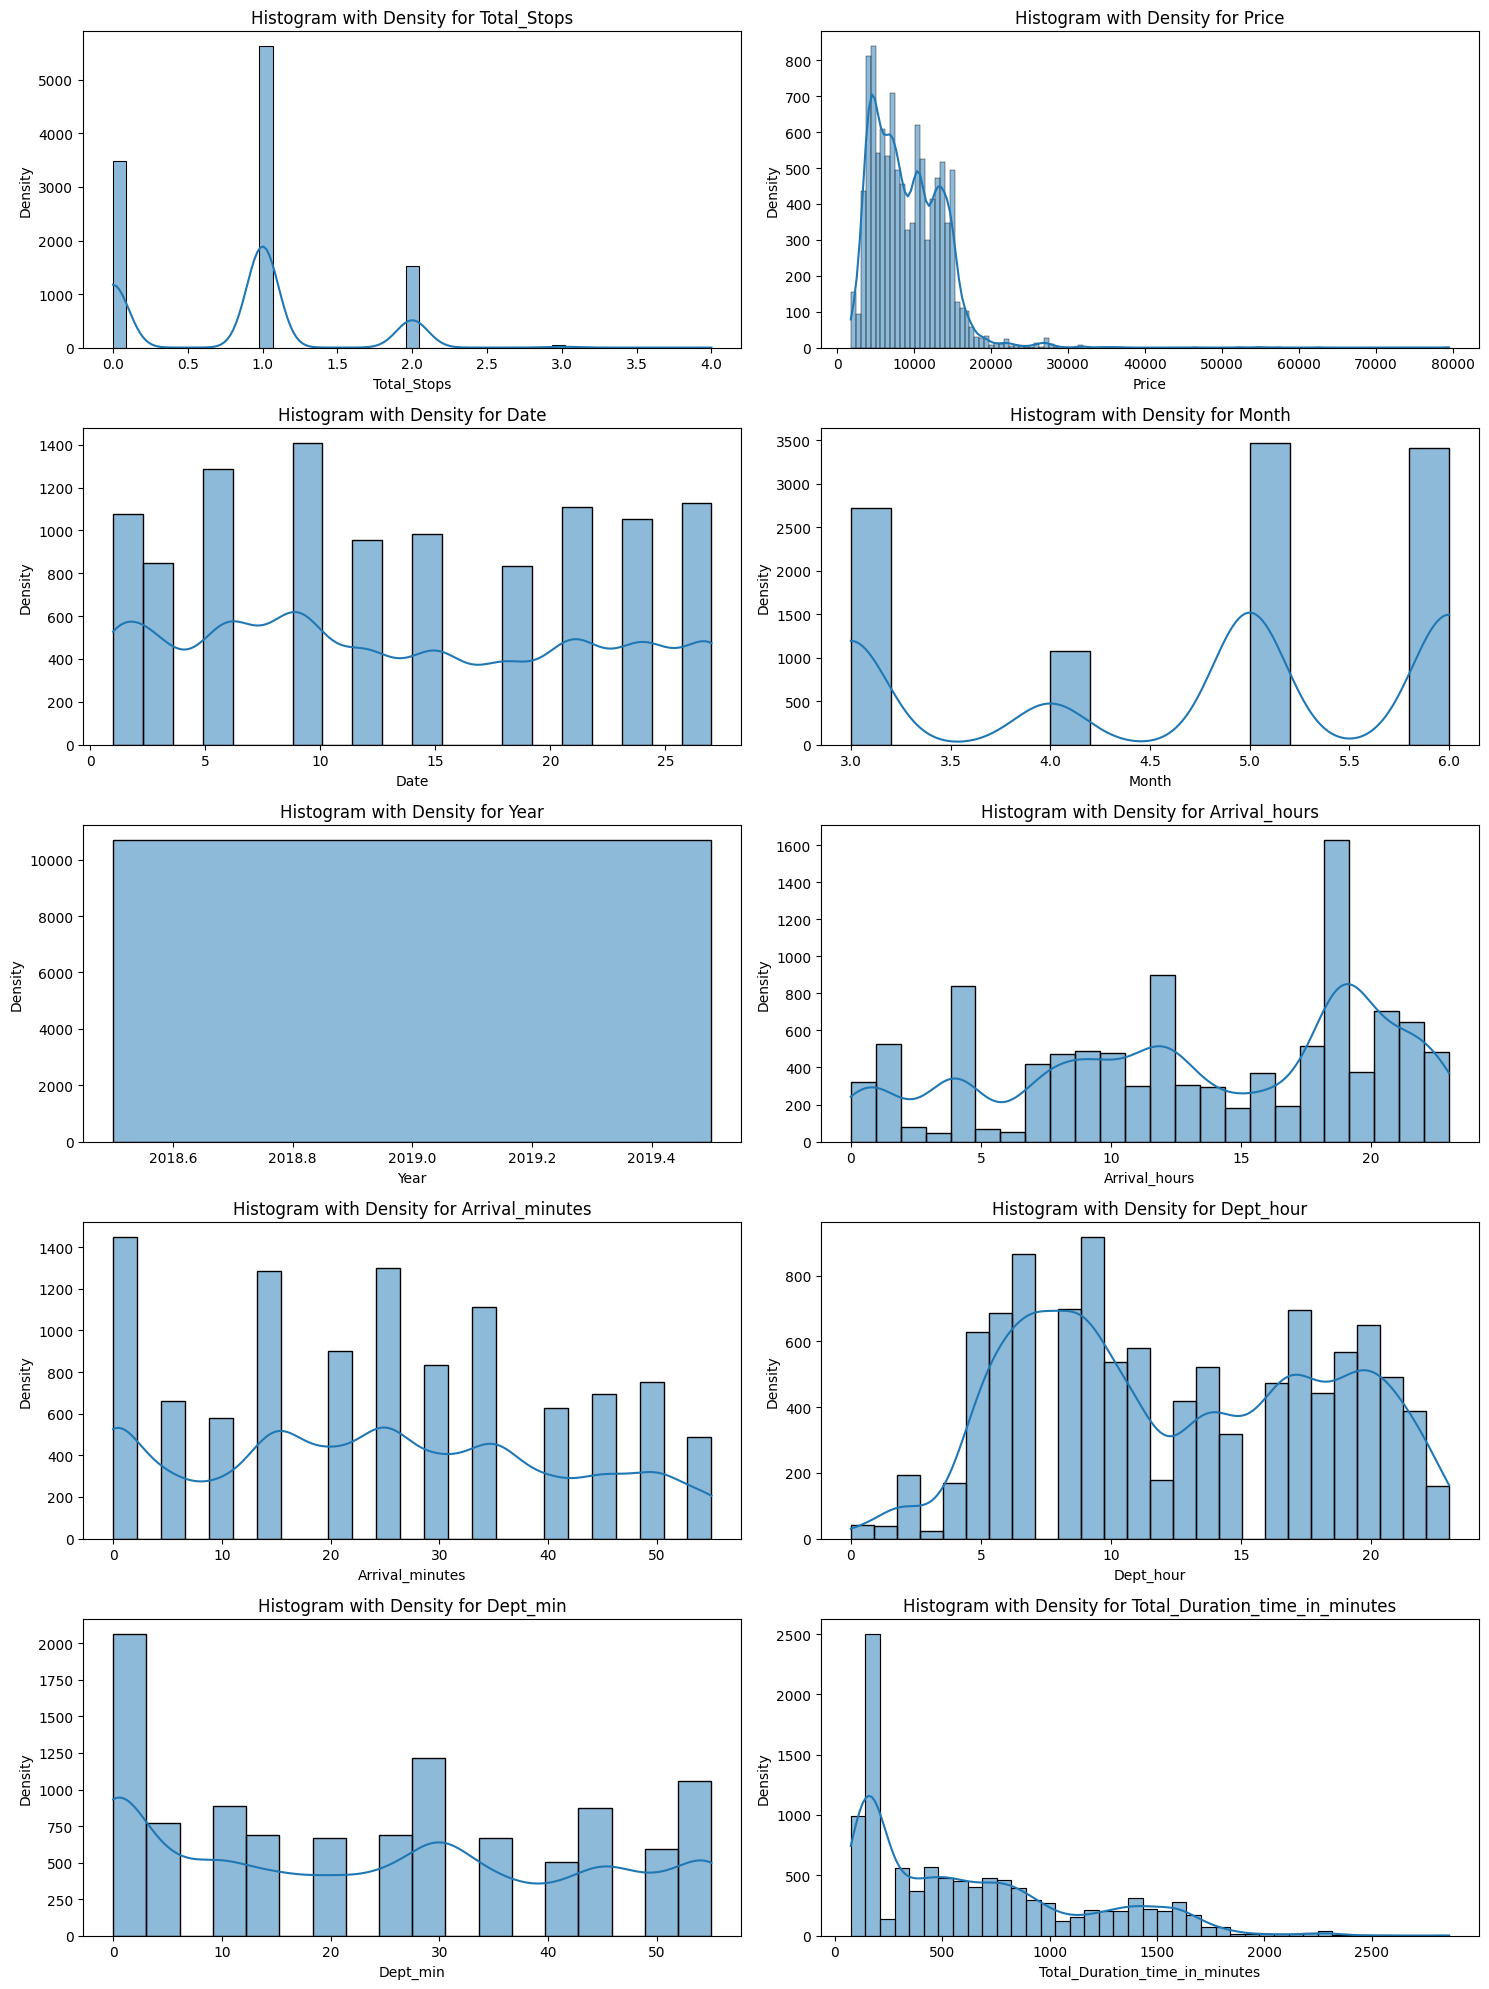

In [33]:
# Set the figure size and arrange plots horizontally in pairs
fig, axes = plt.subplots(nrows=len(numerical_features) // 2, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the selected columns and create histograms with density
for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove any empty subplots if the number of columns is odd
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [34]:
# Find the minimum and maximum price
min_price = df['Price'].min()
max_price = df['Price'].max()

# Calculate the price range
price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

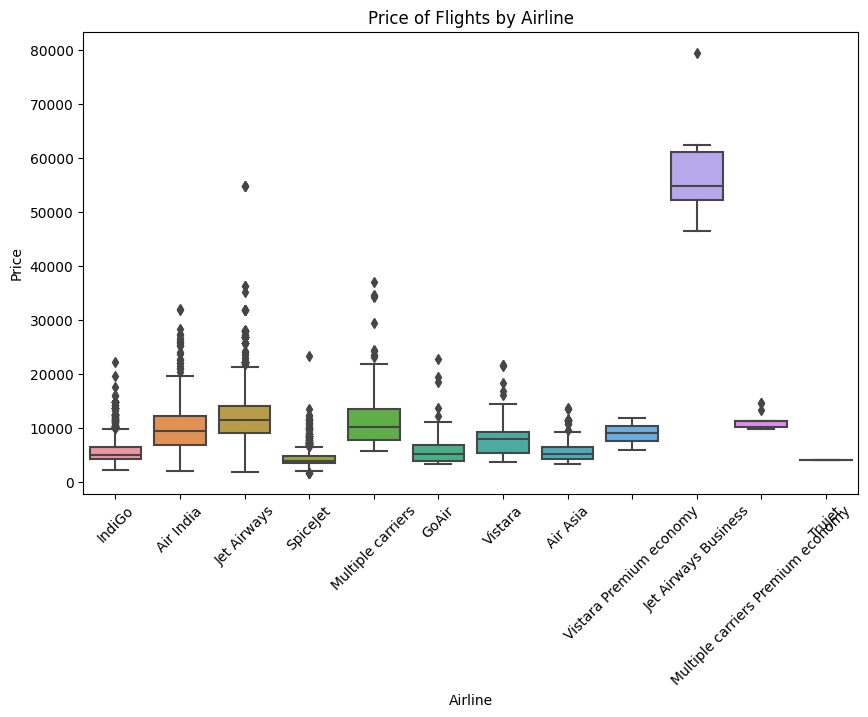

In [35]:
# Create a boxplot to compare prices by airline
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Airline', y='Price', data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.title('Price of Flights by Airline')
plt.show()

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

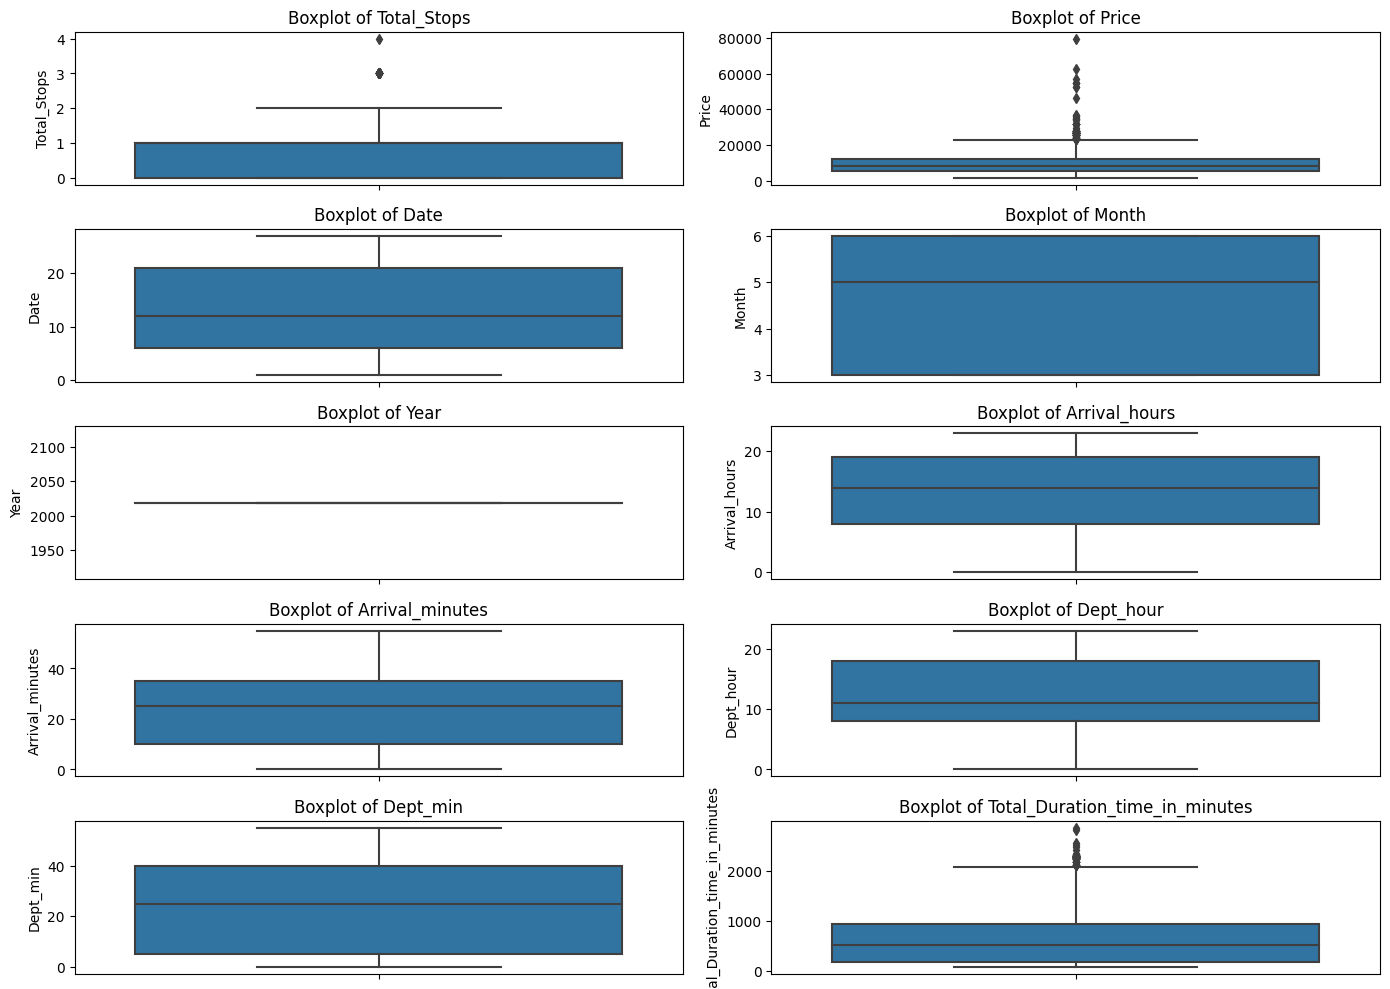

In [36]:
import math

# Calculate the number of rows and columns for subplots based on the number of numerical columns
num_plots = len(numerical_features)
num_rows = math.ceil(num_plots / 2)
num_cols = min(2, num_plots)

# Increase the size of the individual subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create subplots for boxplots
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(data=df, y=col)
    plt.ylabel(col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Here We clearly see that there are some Outliers present in some coloumns and it must be affecting our conclusion

for example in Boxplot of Total_Duration_time_in_minutes there is to many outliers are present.

The presence of many outliers in the boxplot of 'Total_Duration_time_in_minutes' can significantly impact analysis in the following ways:

**Summary Statistics:** Outliers can distort summary statistics such as the mean and standard deviation. In this case, if you have many outliers on the high end of the duration, the mean duration may be significantly higher than what most passengers experience. This can lead to a skewed view of the typical flight duration.

**Data Distribution:** The presence of outliers may affect the normality assumption of your data. Many statistical tests and models assume that data is normally distributed. When you have a large number of outliers, the data distribution may become skewed or non-normal, which can impact the validity of statistical tests and model assumptions.

**Modeling:** If you plan to use this variable as a feature in predictive models, outliers can have a substantial impact. Some machine learning algorithms are sensitive to outliers and may produce biased or less accurate predictions. Outliers can also lead to overfitting, as models may try to fit the extreme values.

**Data Visualization:** In data visualizations, such as scatterplots or line plots involving this variable, the presence of extreme outliers can make it difficult to visualize and interpret relationships. The scale of the y-axis may become distorted, making it challenging to see patterns in the majority of the data.

To address the impact of outliers in your analysis, you can consider the following actions:

**Outlier Handling:** Depending on the nature of your data and analysis goals, you can choose to handle outliers in various ways, such as removing them, transforming the data, or treating them as special cases. Removing outliers should be done cautiously, as they may contain valuable information or reflect real-world variations.

**Transformations:** Apply data transformations like log transformation or winsorization to reduce the impact of extreme values and make the data more suitable for analysis and modeling.

**Robust Statistics:** Use robust statistical measures that are less sensitive to outliers, such as the median and interquartile range, instead of the mean and standard deviation.

**Alternative Models:** Consider using machine learning algorithms that are less sensitive to outliers, such as tree-based models (e.g., random forests or decision trees).

**Segmentation:** If appropriate for your analysis, segment the data into different groups or categories to separately analyze flights with extreme durations and those with typical durations.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

According to the coloumns present in the dataset ,I choose Month,year and Price to know thw peak seasion .

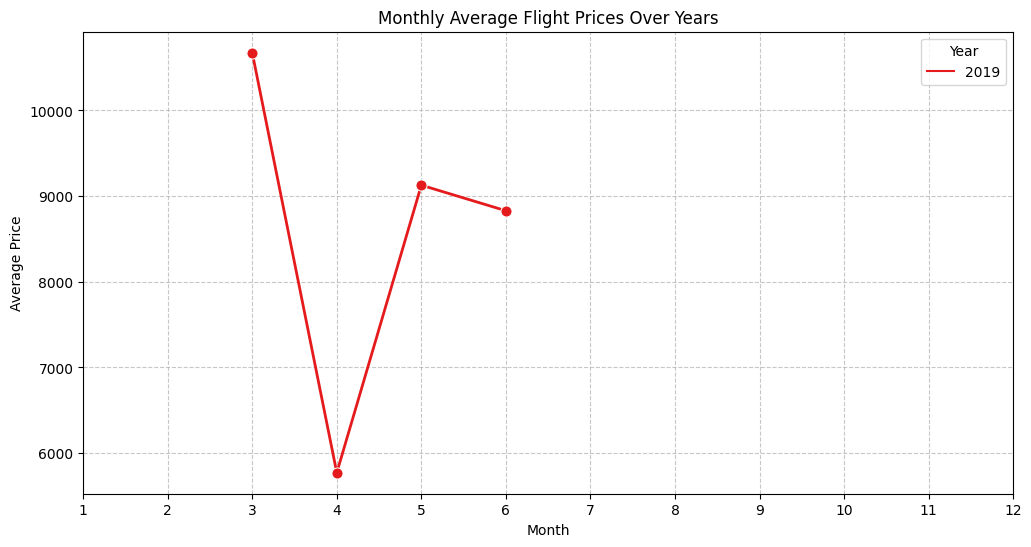

In [37]:
# Calculate monthly average prices
monthly_avg_prices = df.groupby(['Year', 'Month'])['Price'].mean().reset_index()

# Create an line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_prices, x='Month', y='Price', hue='Year', marker='o', palette='Set1', linewidth=2, markersize=8)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Monthly Average Flight Prices Over Years')
plt.xticks(range(1, 13))
plt.legend(title='Year', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We Clearly see that in 3rd month that is March , is the peak season.

# To present your finding that March is the peak season based on the analysis of flight prices

**Title:** Flight Price Analysis Report

**Executive Summary:**
-"March is the peak season for flight prices."

**Introduction:**
- I have Analyzed the Flight Price dataset to know the peak session. It will help us to know the peak session for better and proftablebusiness.

**Methodology:**
- I have cleand the dataset and perform suitable feature extraction to gain inshigts
- features considered (Month, Date, Year, and Price).

**Key Finding:**
-  "Based on the analysis, it is evident that March is the peak season for flight prices."

**Recommendations:**
  - Consider adjusting pricing strategies and marketing efforts to maximize revenue during the peak season in March.
  - Plan promotions or special offers to attract travelers during other months with price variations.

**Limitations:**
- data availability.

**Conclusion:**
- March is the peak season for flight prices.

**Next Steps:**
- I nees to dive in for some better inshight that is best airlines,Fastest Airlines.



# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

To analyze the Flight Price dataset and identify trends in flight prices for a flight booking website, I should focus on several key features and use appropriate visualizations to present your findings effectively. Here's a list of features to analyze and suggested visualizations:

**1. Time Trends:**
   - Features: Date, Month, Year
   - Visualizations:
     - Line plot: Plot average flight prices over time (e.g., months or years) to identify long-term trends.
     - Time series decomposition: Decompose the time series data into trend, seasonal, and residual components to uncover patterns.

**2. Seasonal Variations:**
   - Features: Month, Season (derived from Month)
   - Visualizations:
     - Box plots or violin plots: Compare flight prices by season to identify seasonal variations.
     - Heatmap: Create a heatmap to visualize how flight prices change across months and seasons.

**3. Day-of-Week Trends:**
   - Feature: Day of the week (derived from Date)
   - Visualizations:
     - Bar chart: Analyze how flight prices vary by the day of the week to identify trends in weekday vs. weekend pricing.

**4. Special Events and Holidays:**
   - Features: Date (for identifying holidays and special events)
   - Visualizations:
     - Line plot with annotations: Highlight significant holidays and events on the price trend line plot to assess their impact.

**5. Flight Durations:**
   - Feature: Total Duration Time in minutes
   - Visualizations:
     - Scatterplot: Explore the relationship between flight duration and price to identify any correlations.

**6. Number of Stops:**
   - Feature: Total Stops
   - Visualizations:
     - Bar chart: Compare flight prices based on the number of stops to see if non-stop flights are priced differently.

**7. Airline Comparison:**
   - Feature: Airline
   - Visualizations:
     - Box plots: Compare flight prices across different airlines using box plots or violin plots.
     - Bar chart: Display the average prices for each airline in a bar chart for easy comparison.

**8. Departure and Arrival Times:**
   - Features: Dept_hour, Dept_min, Arrival_hours, Arrival_minutes
   - Visualizations:
     - Line plots or bar charts: Analyze how flight departure and arrival times affect prices.

**9. Geographical Trends:**
   - Features: Origin and Destination airports (if available)
   - Visualizations:
     - Geographic maps or heatmaps: Explore price variations based on the origin and destination locations.

**10. Yearly Trends:**
   - Feature: Year
   - Visualizations:
     - Line plot: Examine year-to-year changes in flight prices.

**11. Pricing Patterns:**
   - Features: Price
   - Visualizations:
     - Histograms or density plots: Visualize the distribution of flight prices to identify price patterns.

**12. Correlations and Regression Analysis:**
   - Explore correlations between flight prices and other numerical features.
   - Consider running regression analysis to predict flight prices based on relevant variables.

**13. Statistical Tests:**
   - Conduct statistical tests (e.g., t-tests, ANOVA) to assess the significance of price differences between different groups or categories (e.g., airlines, seasons).


# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

To know which factor is affecting the price we can see the correlation and then perform EDA for better inshights.

<AxesSubplot: >

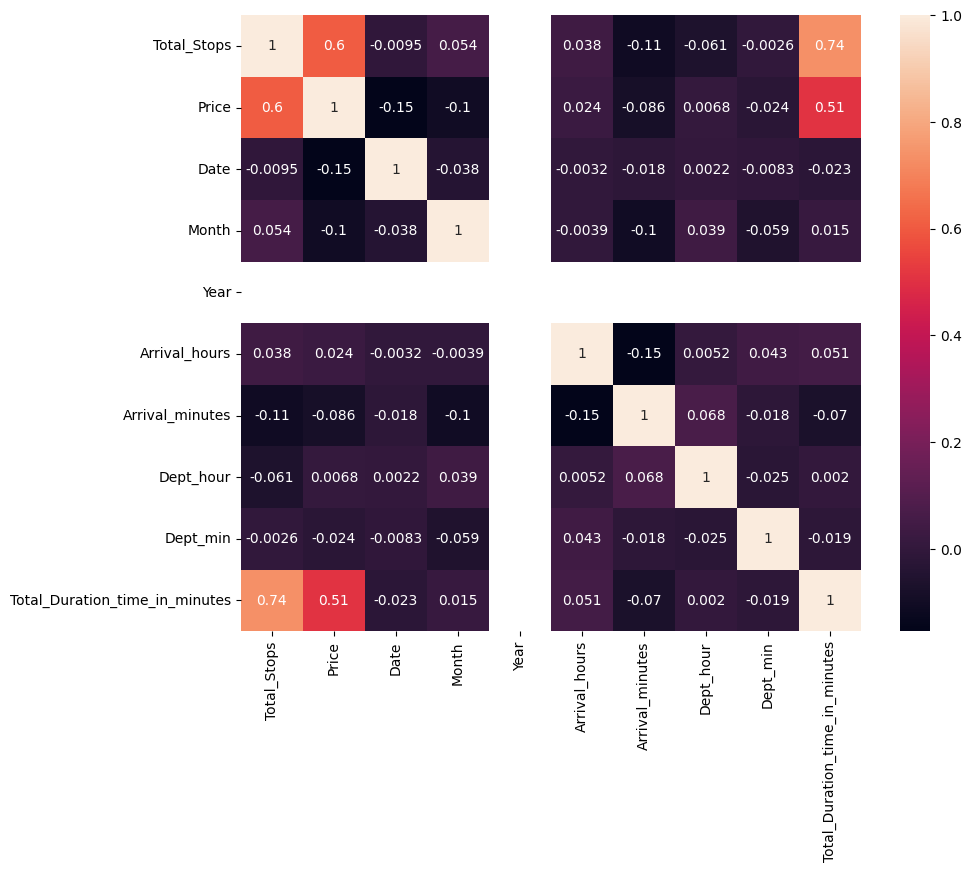

In [38]:
plt.figure(figsize=(10, 8))  
sns.heatmap(df[numerical_features].corr(),annot = True)

We can clearly see that the Price have strong correlation withj Total_Stops and Total_Duration_time_in_minutes

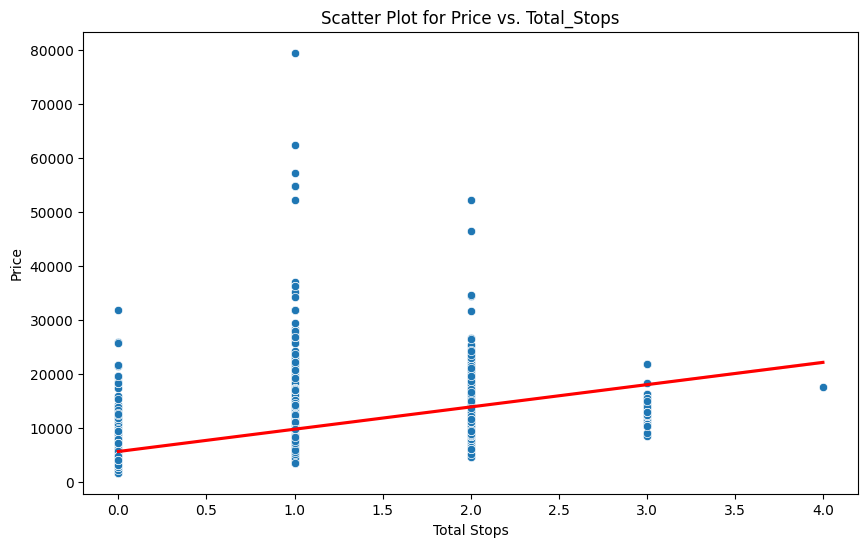

In [39]:
# Create a scatter plot with regression line for Price vs. Total_Stops
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Stops', y='Price', data=df)
sns.regplot(x='Total_Stops', y='Price', data=df, scatter=False, color='red')  # Add a regression line
plt.title('Scatter Plot for Price vs. Total_Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

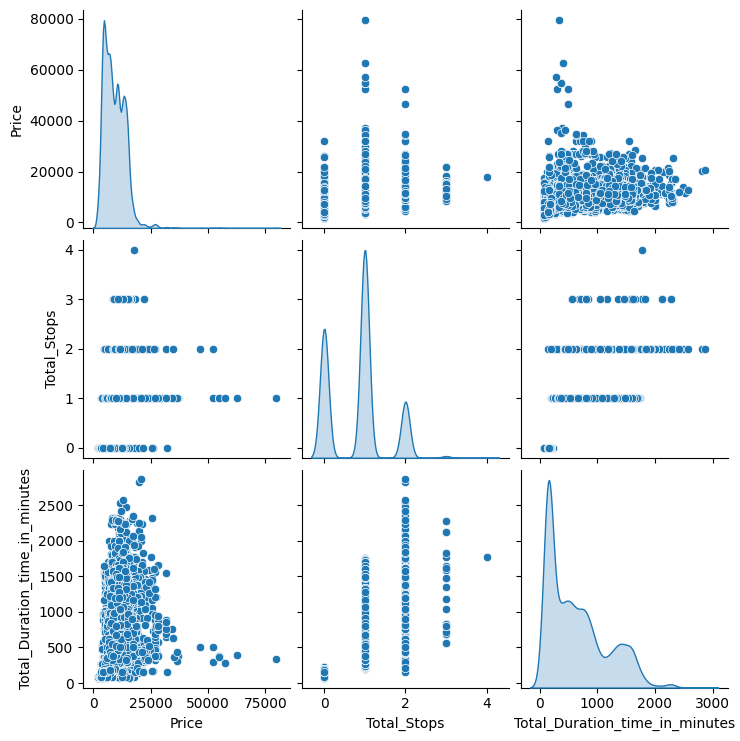

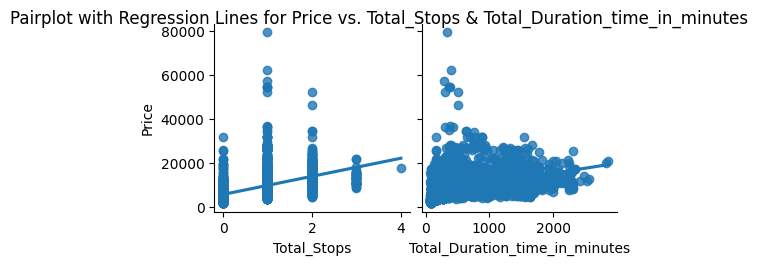

In [40]:
# Create a pairplot with regression lines for Price, Total_Stops, and Total_Duration_time_in_minutes
sns.pairplot(df, vars=['Price', 'Total_Stops', 'Total_Duration_time_in_minutes'], kind='scatter', diag_kind='kde', markers='o')

# Add regression lines to the scatter plots
sns.pairplot(df, x_vars=['Total_Stops', 'Total_Duration_time_in_minutes'], y_vars=['Price'], kind='reg', markers='o')

# Customize plot labels and titles
plt.suptitle('Pairplot with Regression Lines for Price vs. Total_Stops & Total_Duration_time_in_minutes', y=1.02)
plt.show()

To present my findings to the management team I can use suitable graph and a report.

For example:

**1. Title Slide:**
   - Start with a title slide that includes the presentation title, my name, date, and the company's name or logo.

**2. Introduction:**
   - Begin with a brief introduction to set the context for the presentation.
   - Mention the purpose of the analysis: to identify factors affecting flight prices.
   - Highlight the importance of understanding these factors for pricing and decision-making.

**3. Key Findings:**
   - Start by presenting your key finding prominently:
     - "We have identified a strong correlation between flight 'Price' and two key factors: 'Total_Stops' and 'Total_Duration_time_in_minutes'."

**4. Visual Representation:**
   - Display the pairplot with regression lines that illustrates the correlations between these variables.
   - Emphasize the visual trends in the scatter plots and the strength of the relationships indicated by the regression lines.

**5. Correlation Coefficients:**
   - Provide the numerical values of the correlation coefficients (e.g., Pearson's correlation coefficient) for each pair:
     - "The correlation between 'Price' and 'Total_Stops' is X."
     - "The correlation between 'Price' and 'Total_Duration_time_in_minutes' is Y."

**6. Interpretation:**
   - Explain the implications of the strong correlations:
     - "A higher number of total stops tends to be associated with lower flight prices."
     - "Longer total flight durations tend to result in higher flight prices."

**7. Business Impact:**
   - Discuss the potential business impact of these findings:
     - "This information can inform our pricing strategies, allowing us to adjust prices based on factors that strongly influence customer decisions."

**8. Recommendations:**
   - Provide recommendations based on the findings:
     - "Consider offering price incentives for non-stop flights to attract cost-conscious travelers."
     - "Explore opportunities to optimize flight schedules and durations to align with customer preferences."

**9. Next Steps:**
   - Suggest next steps for further analysis or action:
     - "We should conduct a pricing analysis to determine the optimal price points for different flight types."
     - "Explore customer segmentation to tailor pricing strategies to specific customer groups."

**10. Questions and Discussion:**
   - Open the floor for questions and discussion:
     - Encourage the management team to ask questions and seek clarification.

**11. Conclusion:**
   - Summarize the main points of the presentation.
   - Reiterate the significance of understanding the factors influencing flight prices.

**12. Thank You:**
   - Thank the management team for their time and attention.

**13. Backup Slides (Optional):**
   - Include additional slides with detailed data, methodology, or supporting information for reference, in case there are specific questions.


# Google Playstore:

# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [41]:
df=pd.read_csv('googleplaystore.csv')
df.shape

(10841, 13)

it have 10841 rows and 13 coloumns

# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

firs of all we clean the data and convert the required coloumn to numerical data

In [42]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [43]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [44]:
df = df.drop_duplicates()

In [45]:
df = df.dropna(how='all')

In [46]:
df['Rating'] = df['Rating'].fillna(np.mean(df['Rating']))

In [47]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [48]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [49]:
df['Reviews'] = df['Reviews'].replace('3.0M','3000000')

In [50]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [51]:
def convert_to_kb(size):
    if 'M' in size:
        #mb_value = float(size.split('M')[0])
        mb_value = size.split('M')[0]
        kb_value = float(mb_value) * 1024  # 1 MB = 1024 KB
        kb_value = str(f'{kb_value} k')
        return kb_value
    else:
        return size

In [52]:
df['Size'] = df['Size'].apply(convert_to_kb)

In [53]:
df['Size']=df['Size'].str.replace('k','')

In [54]:
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].replace('1,000+','1000')
df['Size']=df['Size'].astype(float)

In [55]:
median_size = df['Size'].median()
df['Size'] = df['Size'].fillna(median_size)

In [56]:
df['Size'].isnull().sum()

0

In [57]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [58]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [59]:
chars_to_remove = ['+',',','$']
coloumns_to_clean = ['Installs','Price']
for item in chars_to_remove:
    for coloumns in coloumns_to_clean:
        df[coloumns] = df[coloumns].str.replace(item,'')

In [60]:
df['Price'] = df['Price'].replace('Everyone',0)

In [61]:
df['Price'] = df['Price'].astype(float)

In [62]:
df['Installs'] = df['Installs'].replace('Free',np.nan)

In [63]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', nan],
      dtype=object)

In [65]:
df['Installs']=df['Installs'].astype(float)

In [66]:
df['Installs'] = df['Installs'].fillna(df['Installs'].median())

In [67]:
df['Installs'].isnull().sum()

0

In [68]:
df['last_Updated_Month']=df['Last Updated'].str.split(' ').str[0]
df['last_Updated_Day']=df['Last Updated'].str.split(' ').str[1]
df['last_Updated_Day']=df['last_Updated_Day'].str.split(',').str[0]
df['last_Updated_year']=df['Last Updated'].str.split(',').str[1]

In [69]:
df['last_Updated_Month'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February', '1.0.19'],
      dtype=object)

In [70]:
df['last_Updated_Month'] = df['last_Updated_Month'].replace('1.0.19','October')

In [71]:
df['last_Updated_Day'].unique()

array(['7', '15', '1', '8', '20', '26', '14', '3', '27', '31', '2', '6',
       '30', '12', '25', '11', '21', '22', '19', '29', '17', '28', '10',
       '18', '16', '4', '24', '23', '9', '5', '13', nan], dtype=object)

In [72]:
df['last_Updated_Day'] = df['last_Updated_Day'].fillna(1)

In [73]:
df['last_Updated_year'] = df['last_Updated_year'].fillna(2019)

In [74]:
df = df.drop('Last Updated',axis = 1)

In [75]:
df['Reviews'] = df['Reviews'].astype(float)
df['last_Updated_Day'] = df['last_Updated_Day'].astype(float)
df['last_Updated_year'] = df['last_Updated_year'].astype(float)

In [76]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews               float64
Size                  float64
Installs              float64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month     object
last_Updated_Day      float64
last_Updated_year     float64
dtype: object

In [77]:
[columns for columns in df.columns if df[columns].dtypes=='O']

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver',
 'last_Updated_Month']

In [78]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        1
Genres                0
Current Ver           8
Android Ver           3
last_Updated_Month    0
last_Updated_Day      0
last_Updated_year     0
dtype: int64

In [79]:
df['Type'] = df['Type'].fillna(df['Type'].mode().iloc[0])

In [80]:
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode().iloc[0])

In [81]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55.0,2764.8,5000.0,Free,0.00,Everyone,Art & Design,NaN,4.2 and up,June,6.0,2018.0
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145.0,11.0,1000000.0,Free,0.00,Everyone,Libraries & Demo,NaN,1.5 and up,February,12.0,2013.0
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010.0,8908.8,500000.0,Free,0.00,Everyone,Tools,NaN,4.0 and up,May,10.0,2017.0
6803,BT Master,FAMILY,4.189542,0.0,222.0,100.0,Free,0.00,Everyone,Education,NaN,1.6 and up,November,6.0,2016.0
7333,Dots puzzle,FAMILY,4.000000,179.0,14336.0,50000.0,Paid,0.99,Everyone,Puzzle,NaN,4.0 and up,April,18.0,2018.0
7407,Calculate My IQ,FAMILY,4.189542,44.0,7372.8,10000.0,Free,0.00,Everyone,Entertainment,NaN,2.3 and up,April,3.0,2017.0
7730,UFO-CQ,TOOLS,4.189542,1.0,237.0,10.0,Paid,0.99,Everyone,Tools,NaN,2.0 and up,July,4.0,2016.0
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.189542,8.0,658.0,1000.0,Free,0.00,Everyone,Books & Reference,NaN,3.0 and up,January,31.0,2017.0


In [82]:
df['Current Ver'] = df['Current Ver'].fillna(1)

In [83]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode().iloc[0])

In [84]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Current Ver           0
Android Ver           0
last_Updated_Month    0
last_Updated_Day      0
last_Updated_year     0
dtype: int64

In [85]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews               float64
Size                  float64
Installs              float64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month     object
last_Updated_Day      float64
last_Updated_year     float64
dtype: object

In [86]:
# mapping the last_Updated_Month 
df['last_Updated_Month']=df['last_Updated_Month'].map({'January':1,'February':2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12})

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
encoder = LabelEncoder()

In [89]:
df['Type'].unique()

array(['Free', 'Paid', '0'], dtype=object)

In [90]:
df['Type'] = df['Type'].replace('0','Free')

In [91]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [92]:
df = df[df['Category'] != 1.9]

In [93]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,7.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8908.8,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,1.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25600.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,8.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2867.2,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,20.0,2018.0


# Create a boxplot to compare rating by Categories

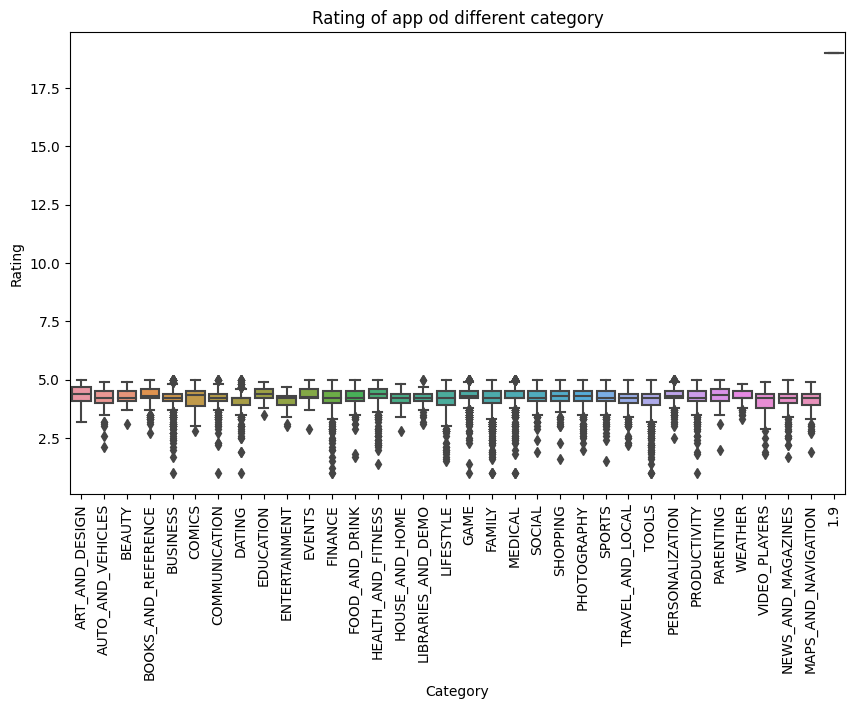

In [94]:

plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Category', y='Rating', data=df)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.title('Rating of app od different category')
plt.show()

# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In the above code we clearly find some missing values in some coloumns:
**column**        **missing values**
- App                  0
- Category             0
- Rating            1474
- Reviews              0
- Size                 0
- Installs             0
- Type                 1
- Price                0
- Content Rating       1
- Genres               0
- Last Updated         0
- Current Ver          8
- Android Ver          3

# null values can impact your analysis:

1. **Bias in Descriptive Statistics:**
   - Null values can distort descriptive statistics, such as mean, median, and standard deviation. If you don't account for missing values, your statistics may not accurately represent the actual data distribution.

2. **Sample Size Reduction:**
   - Rows or records with missing values may be excluded from analysis if they cannot be imputed or if they are removed during data preprocessing. This reduces the effective sample size and may lead to less representative results.

3. **Data Distribution Changes:**
   - If null values are not missing at random but, instead, are related to specific conditions or groups, the data distribution in your analysis may be biased. For example, if income data is missing for low-income individuals, it can skew income analysis.

4. **Impact on Correlations and Relationships:**
   - Null values in variables used for correlation analysis can affect the calculated correlation coefficients. These missing values may obscure or inflate the strength of relationships between variables.

5. **Model Biases:**
   - In predictive modeling, missing values in predictor variables can lead to biased model estimates. Many machine learning algorithms cannot handle missing data directly, so you need to address them through imputation or other techniques.

6. **Bias in Hypothesis Testing:**
   - Null values can lead to biased results in hypothesis testing. For example, if you have null values in a variable you are testing for a significant difference between groups, the results may not be valid.

7. **Misinterpretation of Results:**
   - Failing to account for null values or not properly documenting their handling can lead to misinterpretation of results and incorrect conclusions.

8. **False Insights:**
   - Depending on how missing data is handled, it can create false insights. For instance, imputing missing values with a constant can introduce artificial patterns.

9. **Complexity in Analysis:**
   - Handling null values can add complexity to your analysis, as you need to decide whether to impute, remove, or analyze them separately. The choice may depend on the nature and context of your data.

10. **Loss of Information:**
    - In some cases, null values may contain valuable information. Removing or imputing them without considering their potential significance can lead to the loss of important insights.


# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

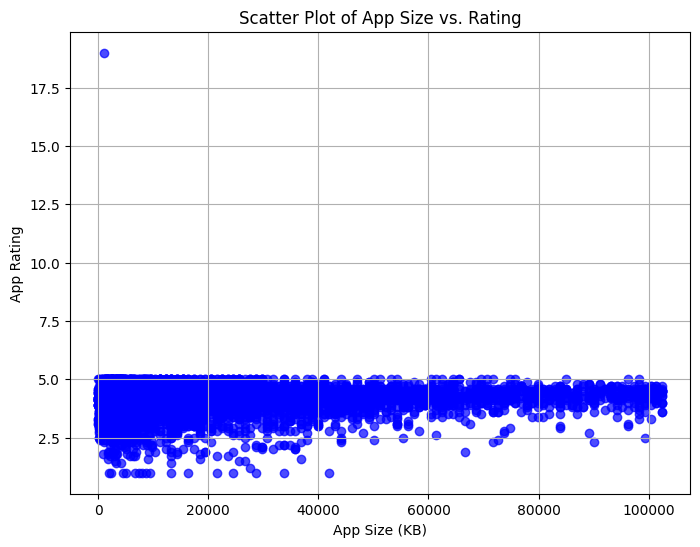

In [95]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df['Size'], df['Rating'], color='blue', alpha=0.7)  # 'alpha' controls point transparency
plt.title('Scatter Plot of App Size vs. Rating')
plt.xlabel('App Size (KB)')
plt.ylabel('App Rating')
plt.grid(True)
plt.show()

# Conclusion
We clearly see that as the size increases the rating of app is also ikncreasing

# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

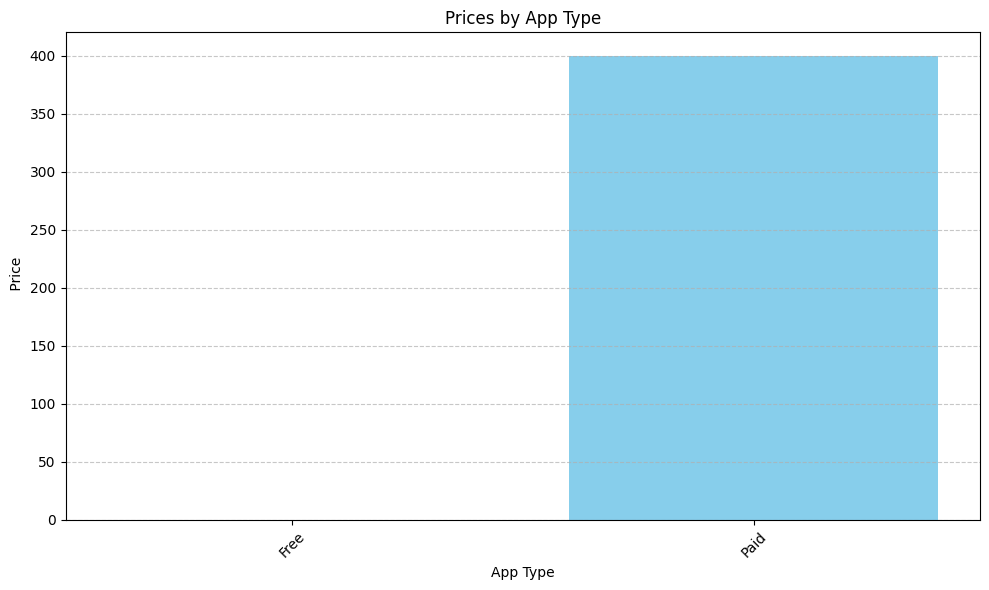

In [96]:
# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.bar(df['Type'], df['Price'], color='skyblue')
plt.title('Prices by App Type')
plt.xlabel('App Type')
plt.ylabel(' Price') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for reference
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the plot area
plt.show()

we clearly see that there is no price for free apps

# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [97]:
# Sort the DataFrame by the 'Installs' column in descending order
df_sorted = df.sort_values(by='Installs', ascending=False)

# Display the top 10 apps with the highest number of installs
top_10_apps = df_sorted[['App','Installs']].head(10) # Display the top 10 apps

# Reset the index to default values and drop the current index
top_10_apps = top_10_apps.reset_index(drop=True)

print(top_10_apps)

                         App      Installs
0         WhatsApp Messenger  1.000000e+09
1               Google Drive  1.000000e+09
2                Google News  1.000000e+09
3         Google Street View  1.000000e+09
4                  Instagram  1.000000e+09
5                   Facebook  1.000000e+09
6  Maps - Navigate & Explore  1.000000e+09
7          Google Play Games  1.000000e+09
8                     Google  1.000000e+09
9                Google News  1.000000e+09


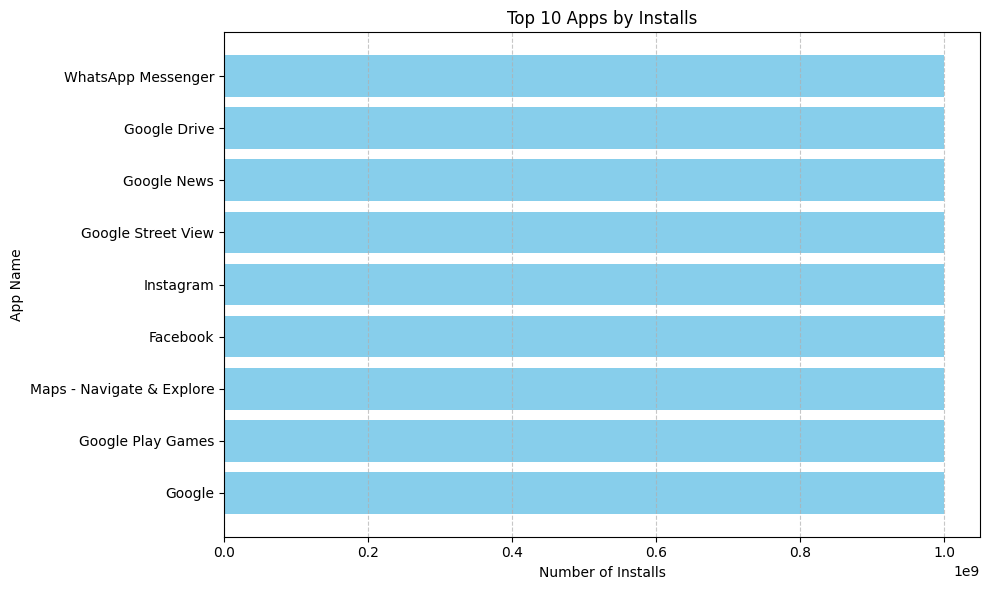

In [98]:
# Create a bar chart to visualize the top 10 apps by installs
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.barh(top_10_apps['App'], top_10_apps['Installs'], color='skyblue')
plt.xlabel('Number of Installs')
plt.ylabel('App Name')
plt.title('Top 10 Apps by Installs')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top app at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a vertical grid for reference
plt.tight_layout()  # Ensure labels and titles fit within the plot area

plt.show()

# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

For most popular app category I Select 'Category' and 'Installs' features

Analyzing the 'Category' and 'Installs' features from the Google Play Store dataset can provide valuable insights and help in several ways:

1. **Identifying Market Trends:** By examining the distribution of apps across categories, you can identify which categories are currently popular and have a significant presence on the platform. This can help you understand market trends and user preferences.

2. **Choosing the Right Category:** For a company planning to launch a new app, this analysis can guide the decision on which category to enter. Choosing a category that is currently popular and has a high number of installs can increase the app's visibility and chances of success.

3. **Competitor Analysis:** You can identify the categories with the highest competition, which may indicate areas where it's more challenging to stand out. Understanding the competitive landscape can help in devising a strategy to differentiate the new app.

4. **User Base Potential:** Analyzing total installs within each category provides insights into the potential user base. Categories with high total installs may offer a larger audience for the new app.

5. **Revenue Potential:** Categories with a high number of installs may also have a higher revenue potential, especially if the apps within those categories offer in-app purchases, subscriptions, or advertising opportunities.

6. **User Engagement:** While this analysis primarily focuses on installs, it's also essential to consider user engagement metrics (e.g., average time spent, user reviews, and ratings) to gauge how users interact with apps in each category. High installs don't necessarily guarantee high user engagement.

7. **Targeted Marketing:** Knowing the popular categories can inform targeted marketing strategies. You can tailor your marketing efforts to reach the specific audience associated with the chosen category.

8. **Risk Assessment:** It's essential to balance popularity with competition. Sometimes, niches with lower competition can offer opportunities for success. Careful consideration of both factors is necessary.

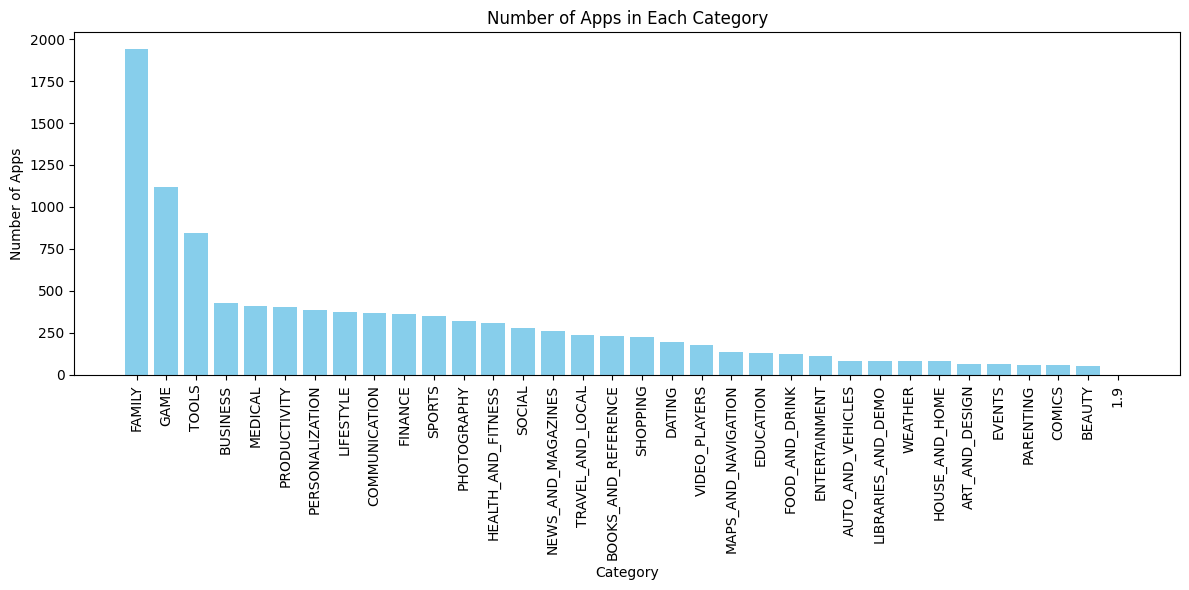

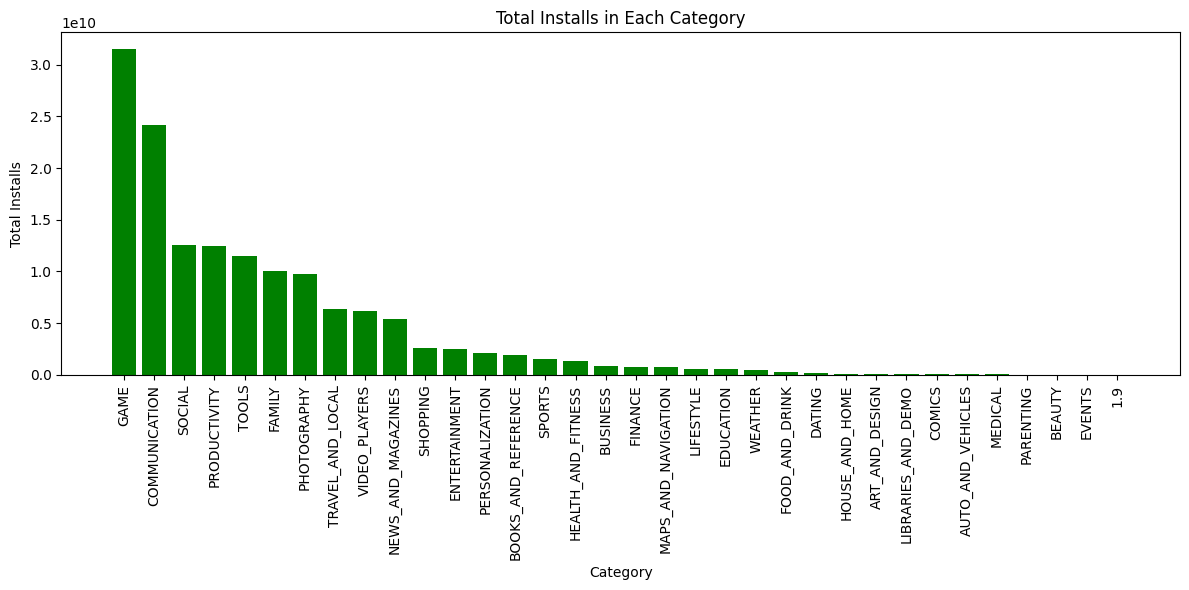

The most popular app category is 'GAME'


In [99]:
# Category Analysis
category_counts = df['Category'].value_counts()
# Create a bar chart to visualize the distribution of apps across categories
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.tight_layout()
plt.show()

# Install Analysis
install_counts = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
# Create a bar chart to visualize the total installs in each category
plt.figure(figsize=(12, 6))
plt.bar(install_counts.index, install_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs in Each Category')
plt.tight_layout()
plt.show()

# Identify the most popular category based on total installs
most_popular_category = install_counts.idxmax()
print(f"The most popular app category is '{most_popular_category}'")


In [100]:
from scipy.stats import f_oneway
# Perform an ANOVA test
category_groups = [df[df['Category'] == category]['Installs'] for category in df['Category'].unique()]
f_statistic, p_value = f_oneway(*category_groups)

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in 'Installs' across categories.")
else:
    print("There is no significant difference in 'Installs' across categories.")

There is a significant difference in 'Installs' across categories.


# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

For analyzing most succesfull developers we can consider 'Category','Instals','Rating','Reviews'.It will give us a insight about most install category and which category have more number of apps ,which category ratings and revies are more and then we try to predict most succeful developer

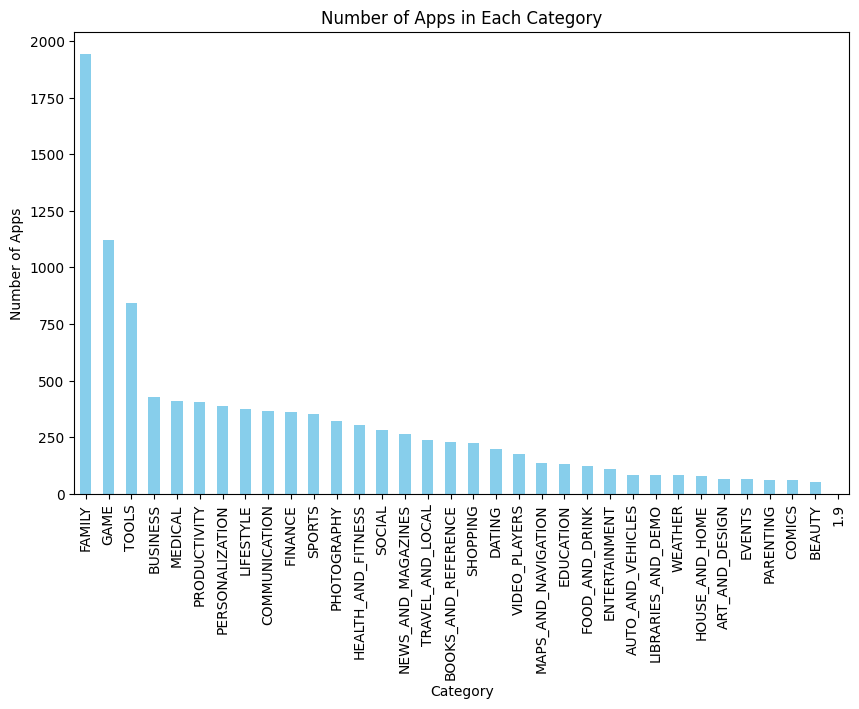

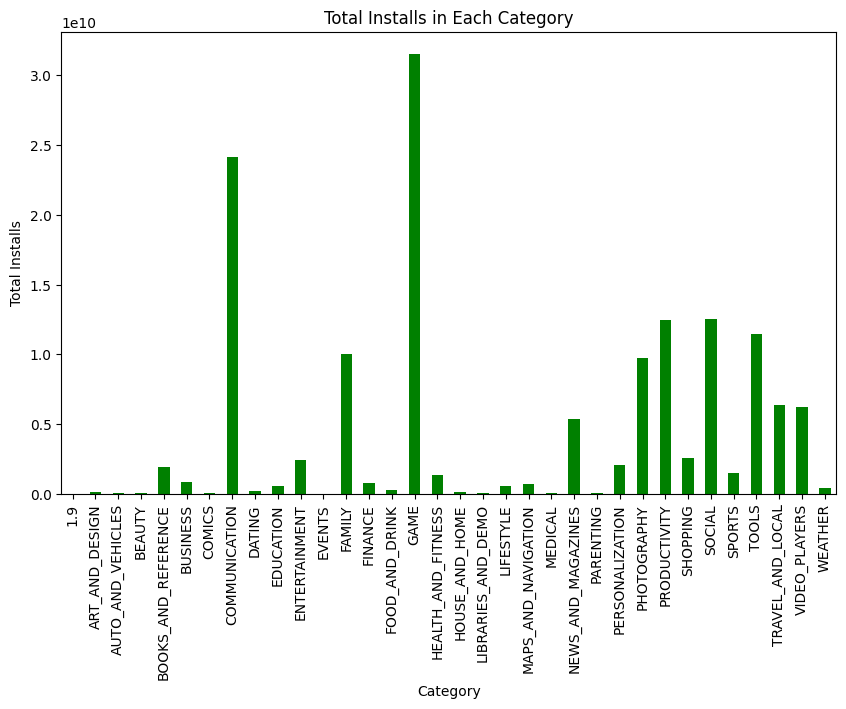

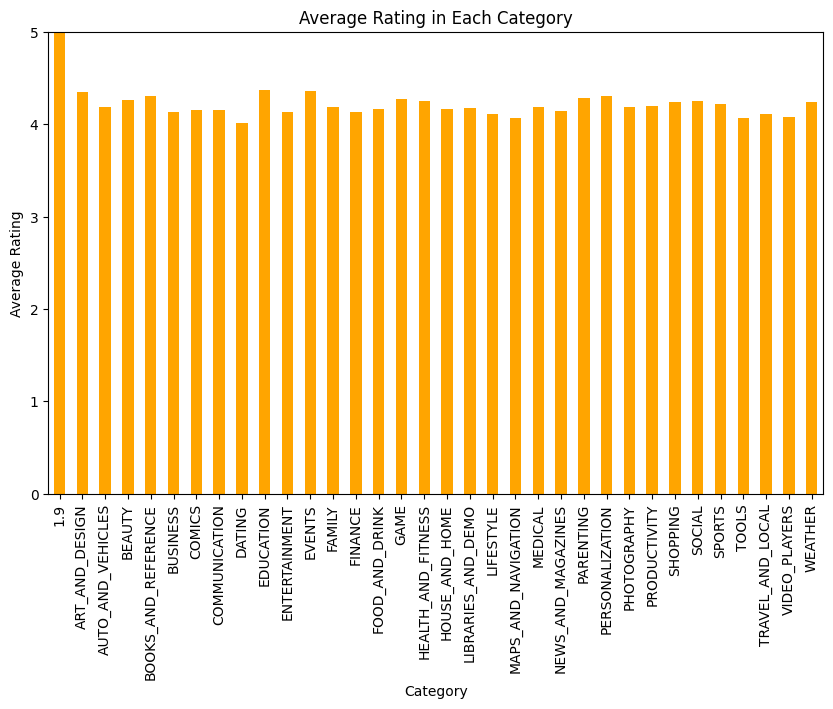

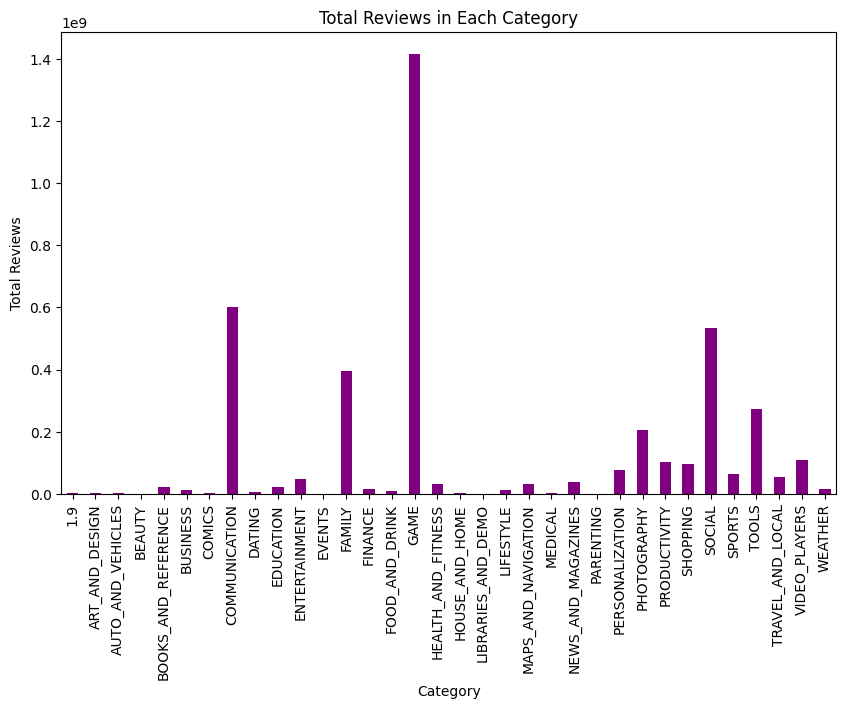

In [101]:
# Analyze Number of Apps per Category
apps_per_category = df['Category'].value_counts()

# Bar chart for Number of Apps per Category
plt.figure(figsize=(10, 6))
apps_per_category.plot(kind='bar', color='skyblue')
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

# Analyze Total Installs per Category
total_installs_per_category = df.groupby('Category')['Installs'].sum()

# Bar chart for Total Installs per Category
plt.figure(figsize=(10, 6))
total_installs_per_category.plot(kind='bar', color='green')
plt.title('Total Installs in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()

# Analyze Average Rating per Category
average_rating_per_category = df.groupby('Category')['Rating'].mean()

# Bar chart for Average Rating per Category
plt.figure(figsize=(10, 6))
average_rating_per_category.plot(kind='bar', color='orange')
plt.title('Average Rating in Each Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.ylim(0, 5)  # Set y-axis limit to the range of ratings (0-5)
plt.show()

# Analyze Total Reviews per Category
total_reviews_per_category = df.groupby('Category')['Reviews'].sum()

# Bar chart for Total Reviews per Category
plt.figure(figsize=(10, 6))
total_reviews_per_category.plot(kind='bar', color='purple')
plt.title('Total Reviews in Each Category')
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.xticks(rotation=90)
plt.show()

# By analyzing Above visuals ,I conclude that family,game and communication category  App Developers are most succesfull.

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

'last_Updated_Month', 'last_Updated_Day', 'last_Updated_year', 'Installs', 'Rating', 'Reviews' are the suitable features for analyze the Google Playstore dataset to identify the best time to launch a new app

To present your findings from the analysis of the Google Play Store dataset regarding the best time to launch a new app, you can use a combination of data visualizations to effectively communicate the insights. Here are some data visualizations that would be useful:

1. **Time Series Plots:** These are essential for showing trends over time. You can create time series plots for metrics like average installs, average ratings, and average reviews over months or years. This helps in identifying patterns and seasonality.

2. **Bar Charts:** Bar charts can be used to display categorical data. You can create bar charts to show the number of app launches by month or the distribution of app launches across different days of the week.

3. **Box Plots:** Box plots can be effective for displaying the distribution of numerical data, such as app ratings or reviews, by launch month or year. They can help identify outliers and central tendencies.

4. **Heatmaps:** Heatmaps are useful for showing correlations between different variables. You can create heatmaps to visualize correlations between app launches and other metrics like installs, ratings, or reviews.

5. **Pie Charts:** Pie charts can be used to illustrate the distribution of app launches by month or year. They provide a quick overview of the proportion of launches in each category.

6. **Scatter Plots:** Scatter plots can help visualize relationships between two numerical variables, such as installs and ratings. You can use them to see if there's a correlation between these factors.

7. **Regression Plots:** If you perform regression analysis to predict future app performance based on historical data, you can create regression plots to display the regression line and observed data points.

8. **Statistical Tests:** Depending on your analysis, you might use statistical tests and present the results as p-values or confidence intervals. These results can be visually represented using tables or charts.

9. **Geospatial Maps:** If you have geographical data, you can create maps to show where app launches are most popular. This can be useful for location-specific launch recommendations.

10. **Word Clouds:** If applicable, you can generate word clouds from user reviews to display common keywords or sentiments associated with apps launched during specific times.

11. **Comparative Charts:** You can create comparative charts to compare app launches in different years, months, or days of the week. This can help in highlighting trends or differences.

12. **Box-and-Whisker Plots:** These plots are useful for showing the distribution of data, including potential outliers, for multiple categories or time periods.


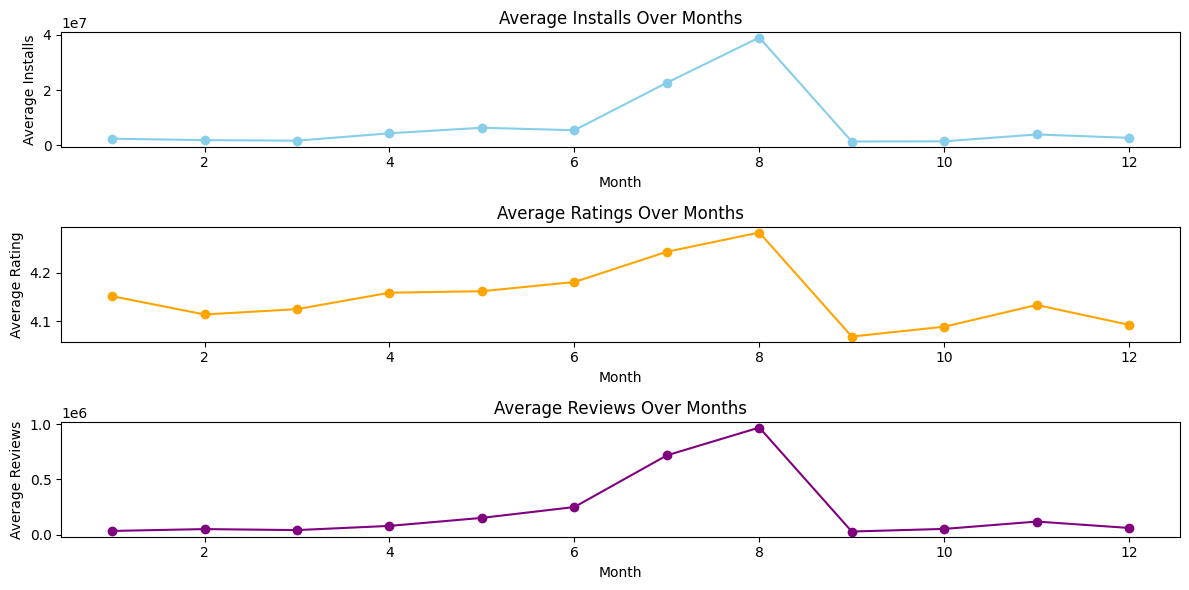

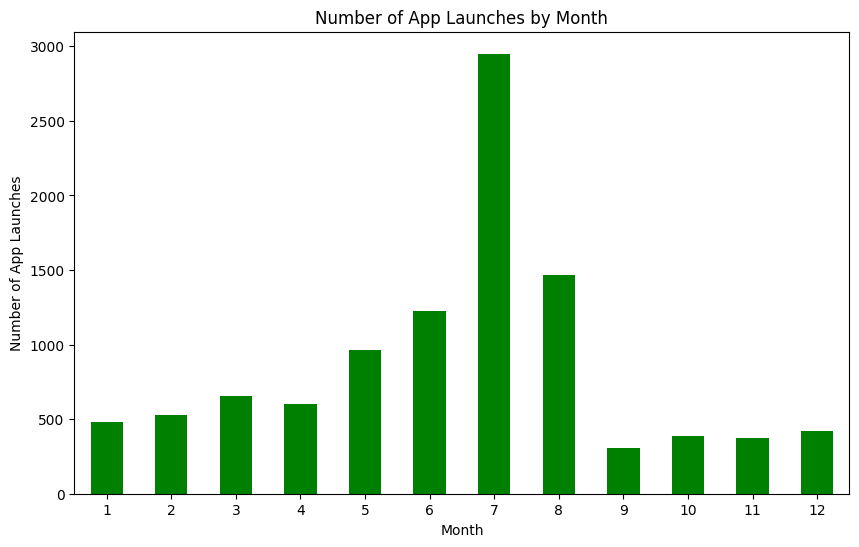

In [102]:
# Extract relevant columns for analysis
launch_data = df[['last_Updated_Month', 'last_Updated_Day', 'last_Updated_year', 'Installs', 'Rating', 'Reviews']]

# Time Series Analysis: Average Installs, Ratings, and Reviews over Time
monthly_avg_installs = launch_data.groupby('last_Updated_Month')['Installs'].mean()
monthly_avg_ratings = launch_data.groupby('last_Updated_Month')['Rating'].mean()
monthly_avg_reviews = launch_data.groupby('last_Updated_Month')['Reviews'].mean()

# Time Series Plots
plt.figure(figsize=(12, 6))
plt.subplot(311)
monthly_avg_installs.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Installs Over Months')
plt.xlabel('Month')
plt.ylabel('Average Installs')

plt.subplot(312)
monthly_avg_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Average Ratings Over Months')
plt.xlabel('Month')
plt.ylabel('Average Rating')

plt.subplot(313)
monthly_avg_reviews.plot(kind='line', marker='o', color='purple')
plt.title('Average Reviews Over Months')
plt.xlabel('Month')
plt.ylabel('Average Reviews')

plt.tight_layout()
plt.show()

# Bar Chart: Number of App Launches by Month
launches_by_month = launch_data['last_Updated_Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
launches_by_month.plot(kind='bar', color='green')
plt.title('Number of App Launches by Month')
plt.xlabel('Month')
plt.ylabel('Number of App Launches')
plt.xticks(rotation=0)
plt.show()

# best time to launch app is july.Most of the apps launched in july 